In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
novaMatrícula = pd.read_csv('/workspaces/Coleguium-Entrevista/Data/Tratados/Nova_Matrícula_Separada.csv')
rematrícula = pd.read_csv('/workspaces/Coleguium-Entrevista/Data/Tratados/Rematrícula_Separada.csv')

In [ ]:
novaMatrícula['Bolsa'] = novaMatrícula['Bolsa (%)'].str.rstrip('%').str.replace(',', '.').astype(float)
rematrícula['Bolsa'] = rematrícula['Bolsa (%)'].str.rstrip('%').str.replace(',', '.').astype(float)

In [ ]:
novaMatrícula

In [ ]:
escolas1 = set(novaMatrícula['Unidade'].unique())
escolas1

In [ ]:
escolas2 = set(rematrícula['Unidade'].unique())
escolas2

### Demonstrando quais unidades apresentam as maiores concessões de descontos

##### Unidades das novas matrículas

In [ ]:
vetor = []
for escola in escolas1:
    pe = novaMatrícula[novaMatrícula['Unidade'] == escola]['Bolsa'].max()
    if(pe == 100):
        vetor.append(escola)
    print("O maior desconto oferecido da unidade", escola, "é de:", pe, "por cento.")

Lista das unidades que mais dão descontos

In [ ]:
i = 0
while i < len(vetor):
    print(vetor[i])
    i+=1

##### Unidades das rematrículas

In [ ]:
for escola in escolas2:
    pe = rematrícula[rematrícula['Unidade'] == escola]['Bolsa'].max()
    print("O maior desconto oferecido da unidade ", escola, "é: ", pe, "por cento.")

Na rematrícula todas as unidades dão descontos que podem ir até 100%.

### Demonstrando a média de desconto das unidades

In [ ]:
médiaRematrícula = rematrícula.groupby('Unidade').agg(
    Soma = ('Bolsa', 'sum'),
    Contagem = ('Bolsa' , 'count')
)

In [ ]:
médiaRematrícula['média'] = round(médiaRematrícula['Soma']/médiaRematrícula['Contagem'])
médiaRematrícula

In [ ]:
médiaNovaMatrícula = novaMatrícula.groupby('Unidade').agg(
    Soma = ('Bolsa', 'sum'),
    Contagem = ('Bolsa' , 'count')
)

In [ ]:
médiaNovaMatrícula['média'] = round(médiaNovaMatrícula['Soma']/médiaNovaMatrícula['Contagem'])
médiaNovaMatrícula

In [ ]:
plot1 = novaMatrícula.merge(médiaNovaMatrícula, on = 'Unidade', how = 'left')
plot2 = rematrícula.merge(médiaRematrícula, on = 'Unidade', how = 'left')

In [ ]:
plt.bar((plot1['Unidade']), plot1['média'], color = 'red')
plt.title('Média de Descontos das Novas Matrículas')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Conceição do Mato Dentro'),
  Text(1, 0, 'Castelo'),
  Text(2, 0, 'Castelo Manacás'),
  Text(3, 0, 'Lagoa Santa'),
  Text(4, 0, 'Gutierrez'),
  Text(5, 0, 'Jaraguá'),
  Text(6, 0, 'Alípio de Melo'),
  Text(7, 0, 'Carlos Prates'),
  Text(8, 0, 'Mais Buritis'),
  Text(9, 0, 'Mais Cidade Nova'),
  Text(10, 0, 'Nova Suíça'),
  Text(11, 0, 'Santa Amélia'),
  Text(12, 0, 'Mais Pampulha'),
  Text(13, 0, 'Carajás'),
  Text(14, 0, 'Jardim Canadá'),
  Text(15, 0, 'Mais Belvedere'),
  Text(16, 0, 'Ouro Preto'),
  Text(17, 0, 'Ouro Preto Integral')])

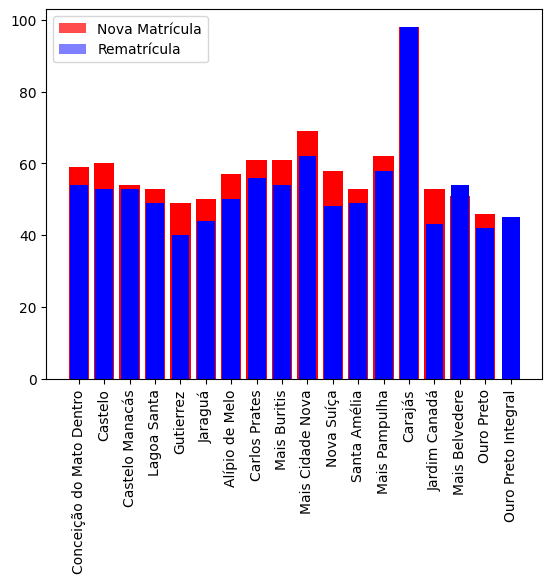

In [27]:
plt.bar(plot1['Unidade'], plot1['média'], color='red', alpha=0.7, label='Nova Matrícula', width=0.8)

plt.bar(plot2['Unidade'], plot2['média'], color='blue', alpha=0.5, label='Rematrícula', width=0.7)

plt.legend()
plt.xticks(rotation=90)